# 1 Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# 2 Dataset Source :- 
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# 3 Importing Libraries

In [ ]:
#importing all the necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn import preprocessing
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced


from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder    
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))

# 4 Loading the Dataset

In [ ]:
df = pd.read_excel('Default_credit_clients.xls',header=1)

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
#displaying the head of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- There are variables that need to be converted to categories:

- SEX: Gender
              1 = male 
              2 = female
- EDUCATION:
               1 = graduate school 
               2 = university 
               3 = high school 
               4 = others 
               5 = unknown 
               6 = unknown
               
- MARRIAGE: Marital status
              1 = married
              2 = single
              3 = others
- PAY_0,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)
              -2= no consumption
              -1= pay duly
              1 = payment delay for one month
              2 = payment delay for two months
              ... 
              8 = payment delay for eight months
              9 = payment delay for nine months and above

# 5 Descriptive Statistics

In [ ]:
#Checking the null-value in the dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(df.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

                              count       mean        std       min       25%       50%  \
ID                          30000.0   15000.50    8660.40       1.0   7500.75   15000.5   
LIMIT_BAL                   30000.0  167484.32  129747.66   10000.0  50000.00  140000.0   
SEX                         30000.0       1.60       0.49       1.0      1.00       2.0   
EDUCATION                   30000.0       1.85       0.79       0.0      1.00       2.0   
MARRIAGE                    30000.0       1.55       0.52       0.0      1.00       2.0   
AGE                         30000.0      35.49       9.22      21.0     28.00      34.0   
PAY_0                       30000.0      -0.02       1.12      -2.0     -1.00       0.0   
PAY_2                       30000.0      -0.13       1.20      -2.0     -1.00       0.0   
PAY_3                       30000.0      -0.17       1.20      -2.0     -1.00       0.0   
PAY_4                       30000.0      -0.22     

- The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.

- Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

- This shows that our dataset has no null value.

# 6 Data Exploration on Raw Data

## Categorical Variables

In [ ]:
#Marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<AxesSubplot:>

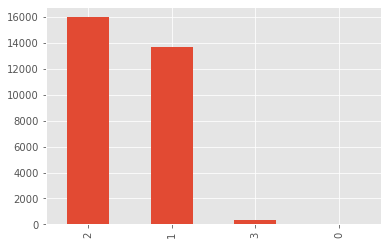

In [ ]:
df['MARRIAGE'].value_counts().plot(kind = 'bar')

In [ ]:
#Education
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<AxesSubplot:>

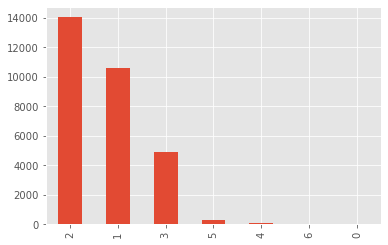

In [ ]:
df['EDUCATION'].value_counts().plot(kind = 'bar')

In [ ]:
#Sex
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:>

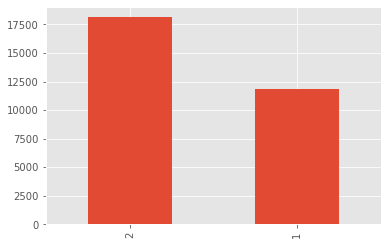

In [ ]:
df['SEX'].value_counts().plot(kind = 'bar')

## Numerical Variables

<AxesSubplot:>

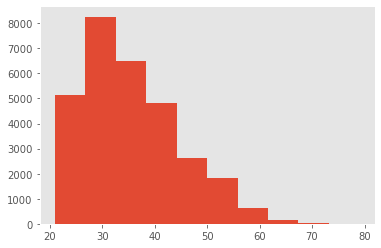

In [ ]:
#Age
df["AGE"].hist(grid = False)

<AxesSubplot:>

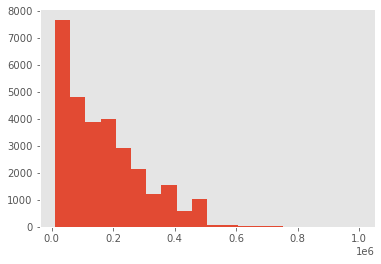

In [ ]:
#Limit Balance
df.LIMIT_BAL.hist(bins = 20, grid = False)

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

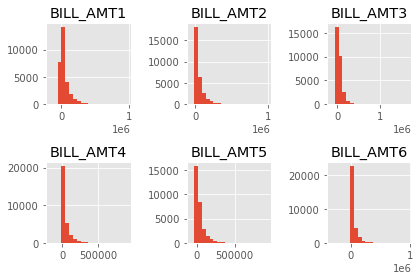

In [ ]:
#Bill Amounts
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

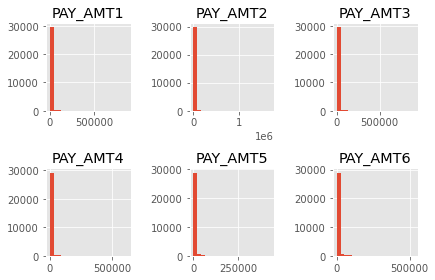

In [ ]:
#Pay Amounts
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

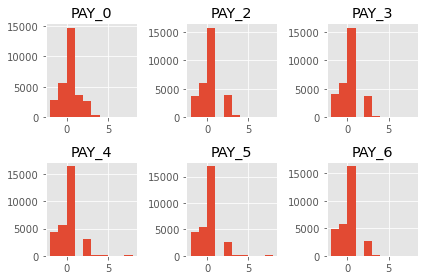

In [ ]:
late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

# Data Cleaning

In [ ]:
df = df.drop('ID', axis = 1)

In [ ]:
#Replacing the column name for convenience
df.rename(columns={"default payment next month": "default"}, inplace = True)

In [ ]:
#Changing Pay_0 to Pay_1 to have continuity
df = df.rename(columns={'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Checking the Columns
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default'],
      dtype='object')

In [ ]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
#Change values for education (1 = Graduate School; 2 = University; 3 = High School; 4 = Others)
#Any value other than 4 will be changed to 4

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION']== 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

- Observations : 
1. "Other" in Education can be an education lower than the High School level.
2. "Other" in Marriage could be, for example, "Divorced".
3. According to our findings, the PAY_n variables indicate the number of months of delay:

 -1 in PAY_n indicates thes customer "Paying Duly" however, there is no clear indication as to what does that values 0 and -2 indicate. Hence, we are adjusting the labels to 0 for Pay Duly category.

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

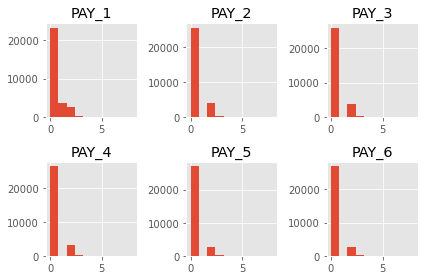

In [ ]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

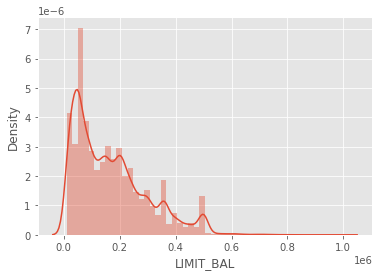

In [ ]:
sns.distplot(df['LIMIT_BAL'],kde=True)

<AxesSubplot:xlabel='AGE', ylabel='Density'>

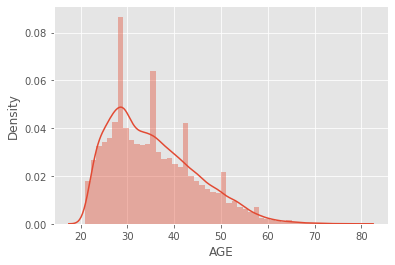

In [ ]:
sns.distplot(df['AGE'],kde=True)

- 0 = pay duly; 1 = payment delay for one month; 
- 2 = payment delay for two months; . . .; 
- 8 = payment delay for eight months; 
- 9 = payment delay for nine months and above. 
- #X12-X17: Amount of bill statement (NT dollar). 
- X12 = amount of bill statement in September, 2005; 
- X13 = amount of bill statement in August, 2005; . . .; 
- X17 = amount of bill statement in April, 2005. 

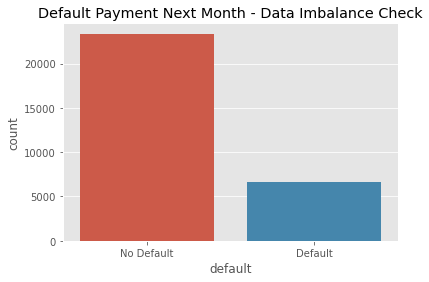

In [ ]:
#Checking the Imbalance
df['default'].value_counts()
plt.title('Default Payment Next Month - Data Imbalance Check')
ax1 = sns.countplot(x='default', data = df)
ax1.set_xticklabels(['No Default','Default'])
plt.show()

- The above graphs shows that our dataset is not a huge imbalance. This is a binary classification problem.

# Distribution of Defaulted Credit cards vs Non- defaulted

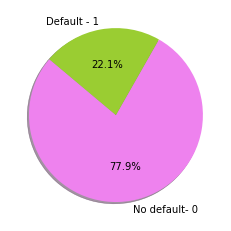

In [ ]:
plt.figure(2)
labels =  'No default- 0','Default - 1'
colors = ['violet', 'yellowgreen']
plt.pie(df.groupby('default').size(),labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')

plt.show()

- Data is highly imbalanced with a ratio of about 78 :22 percent

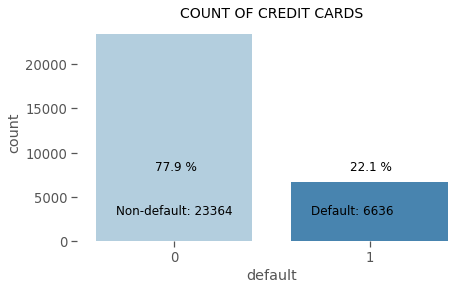

In [ ]:
# The frequency of defaults
yes = df.default.sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('default',data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

# Affect of different predictors on the target variable

### Frequency of explanatory variables by defaulted and non-defaulted cards

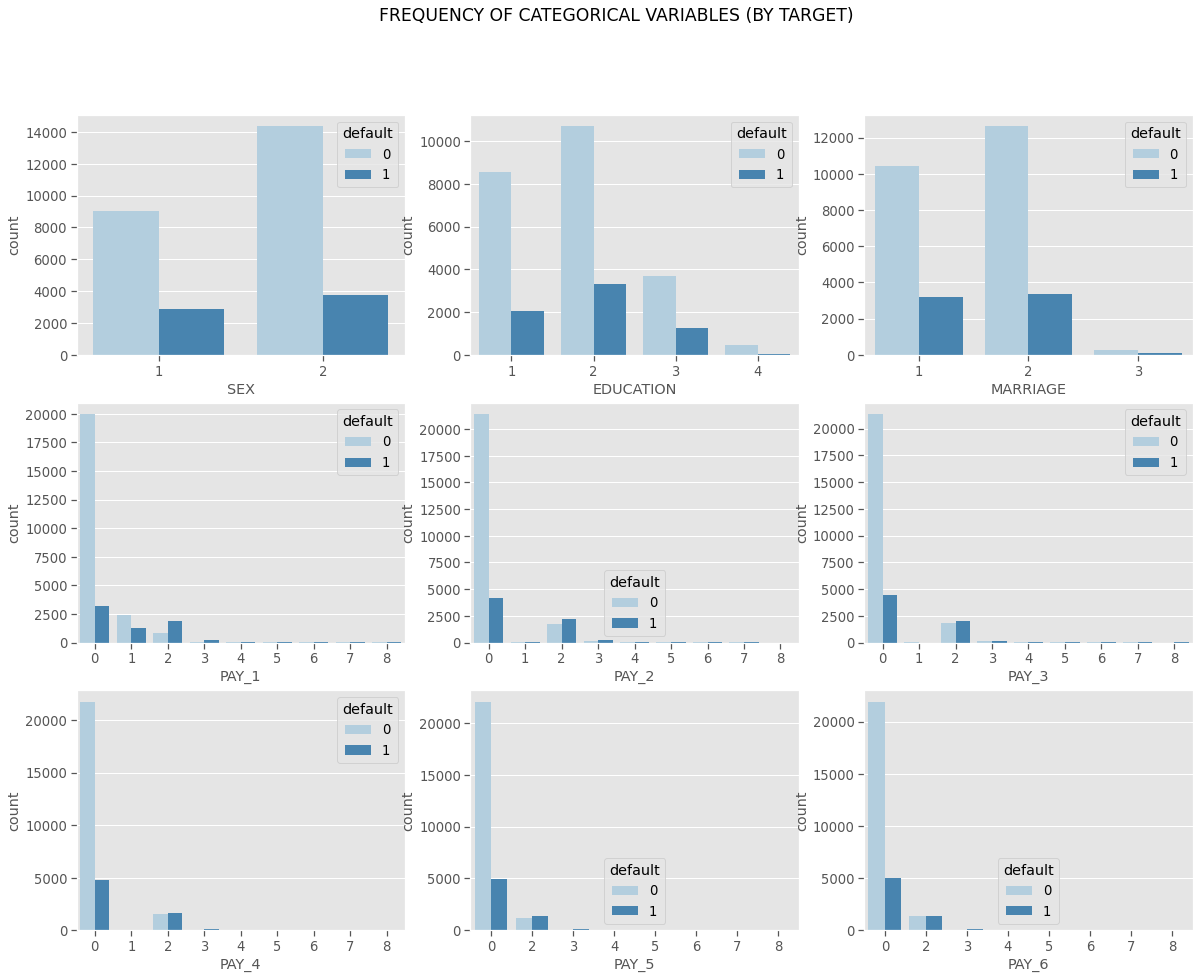

In [ ]:
# Creating a new dataframe with categorical variables
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="Blues", ax=axes[2,2]);

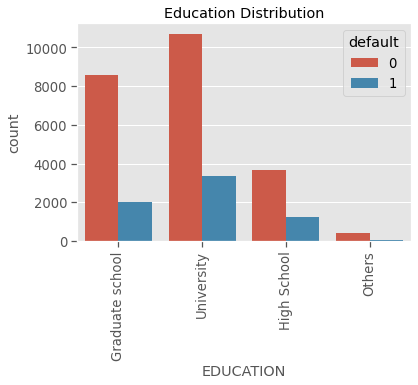

In [ ]:
#Education Distribution
plt.title('Education Distribution')
ax2 = sns.countplot(x = 'EDUCATION', hue = 'default', data = df)
ax2.set_xticklabels(['Graduate school','University','High School','Others'], rotation = 90)
plt.show()

1 : graduate school; 2 : university; 3 : high school; 4 : others


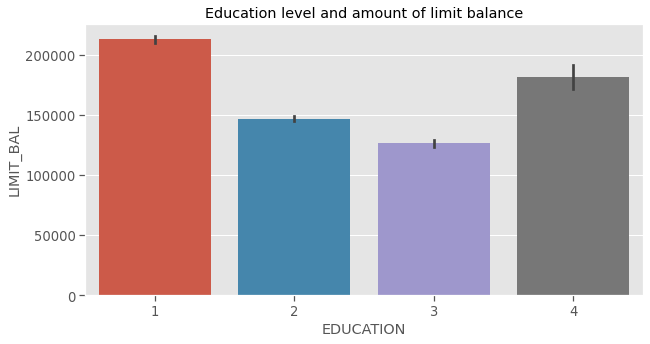

In [ ]:
#Distribution of values for each field
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.barplot(x='EDUCATION',y='LIMIT_BAL', data=df,ax=ax)
plt.title("Education level and amount of limit balance")
print("1 : graduate school; 2 : university; 3 : high school; 4 : others")
plt.show()

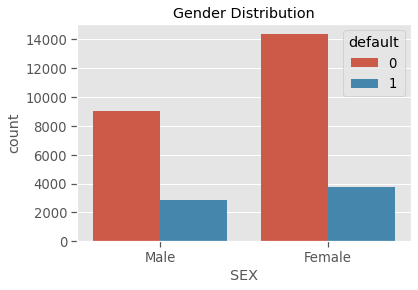

In [ ]:
#Gender Distribution
plt.title('Gender Distribution')
ax3 = sns.countplot(x = 'SEX', hue = 'default', data = df)
ax3.set_xticklabels(['Male','Female'])
plt.show()

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

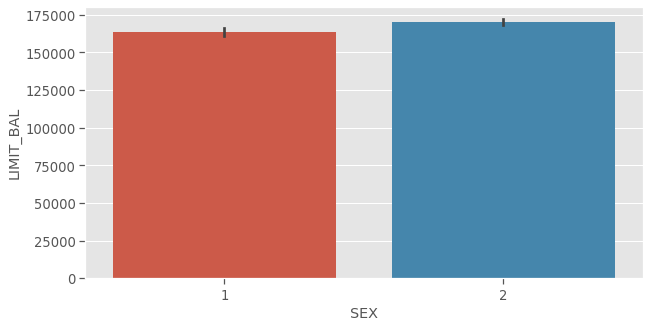

In [ ]:
#Checking if gender has any association with the Limit Balance.
#Equally distributed , no such relationship

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.barplot(x='SEX',y='LIMIT_BAL', data=df,ax=ax)

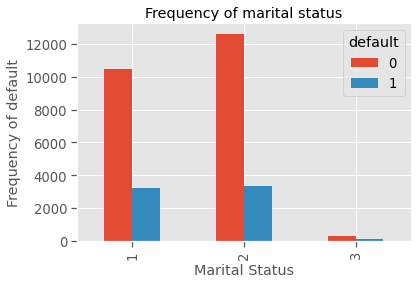

1 : Married; 2 : Single; 3 : Others 


In [ ]:
#Marital status also doesn't provide insights if a person will default or not


pd.crosstab(df['MARRIAGE'],df['default']).plot(kind='bar')
plt.title('Frequency of marital status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of default')
plt.show()
print("1 : Married; 2 : Single; 3 : Others ")

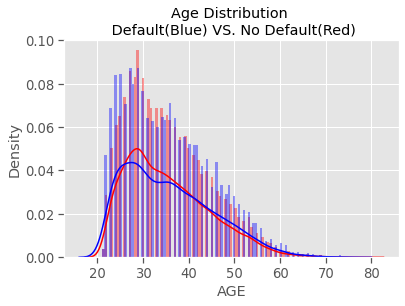

In [ ]:
#Age Distribution
plt.title('Age Distribution \n Default(Blue) VS. No Default(Red)')
agedist0 = df[df['default']==0]['AGE']
agedist1 = df[df['default']==1]['AGE']
sns.distplot(agedist0, bins = 100, color = 'red')
sns.distplot(agedist1, bins = 100, color = 'blue')
plt.show()

- As age increases to 30, the probability of default increases. Meanwhile, when clients are over 30, the probability decreases when aging.

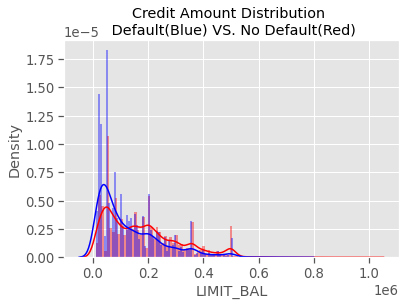

In [ ]:
#Credit Amount Distribution
plt.title('Credit Amount Distribution \n Default(Blue) VS. No Default(Red)')
cadist0 = df[df['default']==0]['LIMIT_BAL']
cadist1 = df[df['default']==1]['LIMIT_BAL']
sns.distplot(cadist0, bins = 100, color = 'red')
sns.distplot(cadist1, bins = 100, color = 'blue')
plt.show()

- Clients with lower amounts tend to default. Especially those with credit amount around 50000 default most.

In [ ]:
# Separating features and target
y = df.default     # target default=1 or non-default=0
features = df.drop('default', axis = 1, inplace = False)

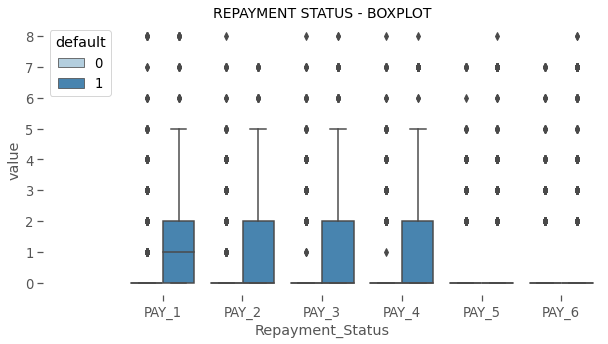

In [ ]:
Repayment = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

In [ ]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[features].copy()
print(X.columns)
y = df['default'].copy()
print(y.sample(5))

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
9295     1
18872    0
3202     0
5156     0
2820     0
Name: default, dtype: int64


In [ ]:
df.to_csv('Project_EDA.csv',index = False)